<a href="https://colab.research.google.com/github/keripikkaneboo/Machine-Learning/blob/main/UAS/Regression/Regression%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1oEXSD137hPm_Fx5xSPRvlAr3silj3suK

Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=c551b126-9e3b-4977-88cd-3540e1f68172
To: /content/RegresiUTSTelkom.csv
100% 443M/443M [00:06<00:00, 70.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/RegresiUTSTelkom.csv")

# Tentukan target (kolom integer pertama)
target_col = df.select_dtypes(include='int').columns[0]
X = df.drop(columns=[target_col])
y = df[target_col]

# Pembersihan awal
X = X.dropna(axis=1, how='all')  # drop kolom yang semua nilainya NaN
X = X.ffill()     # impute NaN dengan forward fill

# Hanya pilih kolom numerik
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi Pearson antar fitur
corr_matrix = numerical_df.corr()

# Ambil korelasi dengan target
target_col = numerical_df.columns[0]
correlations = numerical_df.corr()[target_col].drop(target_col)

# Ambil fitur dengan korelasi absolut > 0.2
selected_features = correlations[correlations.abs() > 0.2].index.tolist()

print("Fitur yang dipilih:", selected_features)

Fitur yang dipilih: ['49.94357']


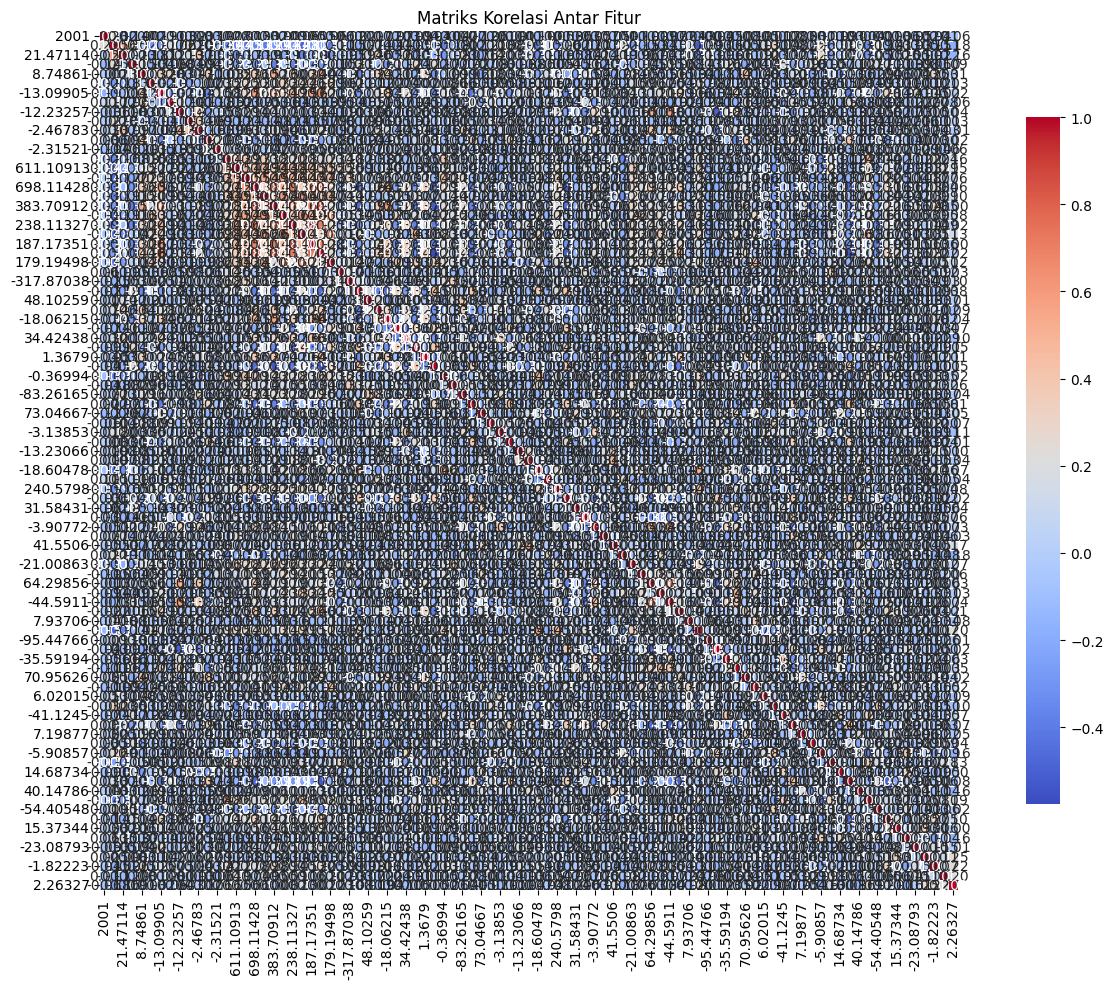

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Matriks Korelasi Antar Fitur")
plt.tight_layout()
plt.show()

In [ ]:
target_col = df.select_dtypes(include='int').columns[0]
y = df[target_col]
X = df.drop(columns=[target_col])

# ======= FITUR NUMERIK DENGAN KORELASI CUKUP ===========
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlations = numerical_df.corr()[target_col].drop(target_col)
selected_numeric = correlations[correlations.abs() > 0.2].index.tolist()

# =========== IDENTIFIKASI FITUR =============
numeric_features = [col for col in selected_numeric if col in X.columns]
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# =========== PIPELINE PREPROCESSING ==========
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# =========== TRANSFORMASI & SPLIT DATA ==========
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks, optimizers, regularizers


model_tf = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # dropout lebih besar untuk menekan overfitting
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)  # regresi → 1 output unit, tanpa aktivasi
])


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,     # lebih rendah dari 0.01 agar tidak lompat terlalu besar
    decay_steps=1000,
    decay_rate=0.96                   # decay lebih lembut (bukan 0.9)
)


model_tf.compile(
    optimizer=optimizers.Adam(learning_rate=lr_schedule),
    loss='mse',
    metrics=['mae']
)


early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model_tf.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/100
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 107s 8ms/step - loss: 556290.4375 - mae: 356.1912 - val_loss: 113.0807 - val_mae: 7.5638
Epoch 2/100
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 96s 7ms/step - loss: 117.4077 - mae: 7.9600 - val_loss: 119.7800 - val_mae: 8.7463
Epoch 3/100
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 96s 7ms/step - loss: 114.3365 - mae: 7.8694 - val_loss: 113.2297 - val_mae: 8.0935
Epoch 4/100
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/step - loss: 113.9995 - mae: 7.8554 - val_loss: 111.5081 - val_mae: 7.8304
Epoch 5/100
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 93s 7ms/step - loss: 113.5580 - mae: 7.8399 - val_loss: 112.2668 - val_mae: 8.0099
Epoch 6/100
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 92s 7ms/step - loss: 111.8346 - mae: 7.7859 - val_loss: 111.1928 - val_mae: 7.6922
Epoch 7/100
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 93s 7ms/step - loss: 112.2279 - mae: 7.8020 - val_loss: 111.3766 - val_mae: 7.8324
Epoch 8/100
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 92s 7ms/step - loss: 112.7573 - mae: 7.7995 - val_los

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

# Dataset
X_train_torch = torch.tensor(X_train.toarray() if hasattr(X_train, 'toarray') else X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test.toarray() if hasattr(X_test, 'toarray') else X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_ds = TensorDataset(X_train_torch, y_train_torch)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

# Model
class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.out = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.dropout(x, 0.3, training=self.training)
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.dropout(x, 0.3, training=self.training)
        return self.out(x)

model_pt = MLPRegressor(X_train_torch.shape[1])
optimizer = torch.optim.AdamW(model_pt.parameters(), lr=0.01, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)
loss_fn = nn.MSELoss()

# Training loop
for epoch in range(100):
    model_pt.train()
    for xb, yb in train_dl:
        pred = model_pt(xb)
        loss = loss_fn(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()

    if epoch % 10 == 0:
        model_pt.eval()
        with torch.no_grad():
            val_loss = loss_fn(model_pt(X_test_torch), y_test_torch).item()
        print(f"Epoch {epoch}, Val Loss: {val_loss:.4f}")


Epoch 0, Val Loss: 559.8275
Epoch 10, Val Loss: 295.1546
Epoch 20, Val Loss: 199.1842
Epoch 30, Val Loss: 120.5190
Epoch 40, Val Loss: 163.5572
Epoch 50, Val Loss: 127.7531
Epoch 60, Val Loss: 111.2715
Epoch 70, Val Loss: 114.9170
Epoch 80, Val Loss: 111.6664
Epoch 90, Val Loss: 111.4539


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi pada data test
y_pred = model_tf.predict(X_test).flatten()

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R-Squared
r2 = r2_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


3221/3221 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
MSE: 111.0288
RMSE: 10.5370
R² Score: 0.0645


##  1. **Model TensorFlow/Keras**

###  Model Sequential (Dense Network)

```python
model_tf = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1)  # output regresi
])
```

###  Penjelasan:

| Layer                  | Fungsi                                                                                     |
| ---------------------- | ------------------------------------------------------------------------------------------ |
| `Input`                | Menentukan bentuk input, yaitu jumlah fitur dari dataset                                   |
| `Dense(128)`           | Fully connected layer dengan 128 unit, relu dipakai agar model bisa belajar non-linearitas |
| `BatchNormalization()` | Menstabilkan dan mempercepat training                                                      |
| `Dropout(0.3)`         | Mencegah overfitting dengan "menonaktifkan" neuron secara acak                             |
| `Dense(64)`            | Layer hidden tambahan untuk menambah kompleksitas                                          |
| `Dense(1)`             | Output layer tunggal untuk regresi                                                         |

### Kelebihan:

* Mudah dibangun dan dikustomisasi
* Cocok untuk regresi standar
* Cepat dalam training

---

##  2. **Model PyTorch**

###  Dense Network (Custom Regressor)

```python
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)
```

###  Penjelasan:

| Komponen              | Fungsi                                                                      |
| --------------------- | --------------------------------------------------------------------------- |
| `nn.Linear(...)`      | Sama seperti `Dense` di Keras, menghubungkan layer sebelumnya ke layer baru |
| `nn.ReLU()`           | Aktivasi non-linear                                                         |
| `nn.BatchNorm1d(...)` | Normalisasi internal agar training stabil                                   |
| `nn.Dropout(...)`     | Regularisasi untuk mengurangi overfitting                                   |
| `nn.Sequential(...)`  | Mempermudah chaining antar layer                                            |

###  Kelebihan:

* Fleksibel dan bisa dimodifikasi untuk kasus yang kompleks
* Bisa ditambahkan loss custom, arsitektur paralel, dll
* Cocok untuk eksperimen advance

---

##  Perbandingan Model Keras vs PyTorch

| Aspek                 | Keras (TF)                                | PyTorch                                           |
| --------------------- | ----------------------------------------- | ------------------------------------------------- |
| Kemudahan             | Sangat mudah & ringkas                    | Sedikit lebih verbose                             |
| Fleksibilitas         | Cukup fleksibel                           | Sangat fleksibel (bisa bikin arsitektur kompleks) |
| Dokumentasi           | Sangat baik                               | Sangat baik, terutama untuk riset                 |
| Kompatibilitas AutoML | Lebih siap pakai (AutoKeras, Keras Tuner) | Perlu setup manual lebih banyak                   |

---

##Model Mana Cocok?

* **Untuk eksplorasi awal dan efisiensi training cepat**: Model **Keras** cocok
* **Untuk proyek skala besar atau arsitektur kustom kompleks (misal multi-output, attention)**: Model **PyTorch** lebih fleksibel